<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Real Estate Prices in Banglore</h1>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.groupby('area_type').agg('count')

availability  location  size  society  total_sqft  bath  \
area_type                                                                       
Built-up  Area                2418      2418  2418     1215        2418  2410   
Carpet  Area                    87        87    87       54          87    87   
Plot  Area                    2025      2025  2009      311        2025  2009   
Super built-up  Area          8790      8789  8790     6238        8790  8741   

                      balcony  price  
area_type                             
Built-up  Area           2310   2418  
Carpet  Area               82     87  
Plot  Area               1837   2025  
Super built-up  Area     8482   8790

In [6]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df.shape

(13320, 9)

In [10]:
df1 = df.copy()
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [11]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [12]:
df2 = df2.rename(columns={'bath':'Bathroom'})  # Renaming columns
df2.head()

location       size total_sqft  Bathroom   price
0  Electronic City Phase II      2 BHK       1056       2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600       5.0  120.00
2               Uttarahalli      3 BHK       1440       2.0   62.00
3        Lingadheeranahalli      3 BHK       1521       3.0   95.00
4                  Kothanur      2 BHK       1200       2.0   51.00

In [13]:
df2.shape

(13320, 5)

**Data Cleaning: Handle NA values**

In [14]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
Bathroom      73
price          0
dtype: int64

In [15]:
df2.shape

(13320, 5)

In [16]:
df3 = df2.dropna()
df3.head()

location       size total_sqft  Bathroom   price
0  Electronic City Phase II      2 BHK       1056       2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600       5.0  120.00
2               Uttarahalli      3 BHK       1440       2.0   62.00
3        Lingadheeranahalli      3 BHK       1521       3.0   95.00
4                  Kothanur      2 BHK       1200       2.0   51.00

In [17]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
Bathroom      0
price         0
dtype: int64

In [18]:
df3.shape

(13246, 5)

<h2 style='color:blue'>Feature Engineering</h2>

**Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**

In [19]:
df3.head() # In Size column there are two type of data like BHK and Bedroom.

location       size total_sqft  Bathroom   price
0  Electronic City Phase II      2 BHK       1056       2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600       5.0  120.00
2               Uttarahalli      3 BHK       1440       2.0   62.00
3        Lingadheeranahalli      3 BHK       1521       3.0   95.00
4                  Kothanur      2 BHK       1200       2.0   51.00

In [20]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-21-d47496571a70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


location       size total_sqft  Bathroom   price  bhk
0  Electronic City Phase II      2 BHK       1056       2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600       5.0  120.00    4
2               Uttarahalli      3 BHK       1440       2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521       3.0   95.00    3
4                  Kothanur      2 BHK       1200       2.0   51.00    2

In [22]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [23]:
df3[df3.bhk>20]

location        size total_sqft  Bathroom  price  bhk
1718  2Electronic City Phase II      27 BHK       8000      27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400      40.0  660.0   43

In [24]:
df3.loc[1718]

location      2Electronic City Phase II
size                             27 BHK
total_sqft                         8000
Bathroom                             27
price                               230
bhk                                  27
Name: 1718, dtype: object

**Explore total_sqft feature**

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  Bathroom    price  bhk
30            Yelahanka      4 BHK     2100 - 2850       4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156       4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105       2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340       2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540       2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter       1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440       2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch       9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145       2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002       4.0  445.000    4

**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple**

In [27]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
convert_sqft_to_num('2116')

2116.0

In [29]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [30]:
convert_sqft_to_num('34.46Sq. Meter')

In [31]:
df4 = df3.copy()

In [32]:
df4.head()

location       size total_sqft  Bathroom   price  bhk
0  Electronic City Phase II      2 BHK       1056       2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600       5.0  120.00    4
2               Uttarahalli      3 BHK       1440       2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521       3.0   95.00    3
4                  Kothanur      2 BHK       1200       2.0   51.00    2

In [33]:
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.head()

location       size  total_sqft  Bathroom   price  bhk
0  Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0       2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3
4                  Kothanur      2 BHK      1200.0       2.0   51.00    2

In [34]:
df3.loc[30]   # total_sqft value is 2100 - 2850

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
Bathroom                4
price                 186
bhk                     4
Name: 30, dtype: object

In [35]:
df4.loc[30]   # total_sqft value is 2475 which is average value from range 2100 - 2850.

location      Yelahanka
size              4 BHK
total_sqft         2475
Bathroom              4
price               186
bhk                   4
Name: 30, dtype: object

In [36]:
(2100+2850)/2

2475.0

<h2 style='color:blue'>Feature Engineering</h2>

**Add new feature called price per square feet**

In [37]:
# Making a copy of data.

df5 = df4.copy()
df5.head()

location       size  total_sqft  Bathroom   price  bhk
0  Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0       2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3
4                  Kothanur      2 BHK      1200.0       2.0   51.00    2

In [38]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']   # 100000 lakh rupees
df5.head()

location       size  total_sqft  Bathroom   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0       2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0       2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [39]:
len(df5.location.unique())

1304

In [40]:
df5.location = df5.location.apply(lambda x: x.strip())
df5.head()

location       size  total_sqft  Bathroom   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0       2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0       2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [41]:
# Location example Giri Nagar have only one row in the data set.

location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [42]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [43]:
len(location_stats)

1293

In [44]:
len(location_stats[location_stats<=10])

1052

In [45]:
len(location_stats[location_stats>10])

241

<h2 style="color:blue">Dimensionality Reduction</h2>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [46]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [47]:
len(df5.location.unique())

1293

In [48]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5.head(11)

location       size  total_sqft  Bathroom   price  bhk  \
0   Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2   
1           Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4   
2                Uttarahalli      3 BHK      1440.0       2.0   62.00    3   
3         Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3   
4                   Kothanur      2 BHK      1200.0       2.0   51.00    2   
5                 Whitefield      2 BHK      1170.0       2.0   38.00    2   
6           Old Airport Road      4 BHK      2732.0       4.0  204.00    4   
7               Rajaji Nagar      4 BHK      3300.0       4.0  600.00    4   
8               Marathahalli      3 BHK      1310.0       3.0   63.25    3   
9                      other  6 Bedroom      1020.0       6.0  370.00    6   
10                Whitefield      3 BHK      1800.0       2.0   70.00    3   

    price_per_sqft  
0      3699.810606  
1      4615.384615  
2      4305.555556  
3      6245.890861  
4      4250.000000  
5      3247.863248  
6      7467.057101  
7     18181.818182  
8      4828.244275  
9     36274.509804  
10     3888.888889

In [49]:
len(df5.location.unique())

242

In [50]:
df5.head(20)

location       size  total_sqft  Bathroom   price  bhk  \
0   Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2   
1           Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4   
2                Uttarahalli      3 BHK      1440.0       2.0   62.00    3   
3         Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3   
4                   Kothanur      2 BHK      1200.0       2.0   51.00    2   
5                 Whitefield      2 BHK      1170.0       2.0   38.00    2   
6           Old Airport Road      4 BHK      2732.0       4.0  204.00    4   
7               Rajaji Nagar      4 BHK      3300.0       4.0  600.00    4   
8               Marathahalli      3 BHK      1310.0       3.0   63.25    3   
9                      other  6 Bedroom      1020.0       6.0  370.00    6   
10                Whitefield      3 BHK      1800.0       2.0   70.00    3   
11                Whitefield  4 Bedroom      2785.0       5.0  295.00    4   
12        7th Phase JP Nagar      2 BHK      1000.0       2.0   38.00    2   
13                 Gottigere      2 BHK      1100.0       2.0   40.00    2   
14                  Sarjapur  3 Bedroom      2250.0       3.0  148.00    3   
15               Mysore Road      2 BHK      1175.0       2.0   73.50    2   
16             Bisuvanahalli      3 BHK      1180.0       3.0   48.00    3   
17     Raja Rajeshwari Nagar      3 BHK      1540.0       3.0   60.00    3   
18                     other      3 BHK      2770.0       4.0  290.00    3   
19                     other      2 BHK      1100.0       2.0   48.00    2   

    price_per_sqft  
0      3699.810606  
1      4615.384615  
2      4305.555556  
3      6245.890861  
4      4250.000000  
5      3247.863248  
6      7467.057101  
7     18181.818182  
8      4828.244275  
9     36274.509804  
10     3888.888889  
11    10592.459605  
12     3800.000000  
13     3636.363636  
14     6577.777778  
15     6255.319149  
16     4067.796610  
17     3896.103896  
18    10469.314079  
19     4363.636364

<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [51]:
df5[df5.total_sqft/df5.bhk<300].head()

location       size  total_sqft  Bathroom  price  bhk  \
9                 other  6 Bedroom      1020.0       6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0       9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0       4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0       7.0   85.0    8   
70                other  3 Bedroom       500.0       3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [52]:
df5.shape

(13246, 7)

In [53]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()

location       size  total_sqft  Bathroom   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0       2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0       2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [54]:
df6.shape

(12502, 7)

<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [55]:
df6.head(10)

location       size  total_sqft  Bathroom   price  bhk  \
0   Electronic City Phase II      2 BHK      1056.0       2.0   39.07    2   
1           Chikka Tirupathi  4 Bedroom      2600.0       5.0  120.00    4   
2                Uttarahalli      3 BHK      1440.0       2.0   62.00    3   
3         Lingadheeranahalli      3 BHK      1521.0       3.0   95.00    3   
4                   Kothanur      2 BHK      1200.0       2.0   51.00    2   
5                 Whitefield      2 BHK      1170.0       2.0   38.00    2   
6           Old Airport Road      4 BHK      2732.0       4.0  204.00    4   
7               Rajaji Nagar      4 BHK      3300.0       4.0  600.00    4   
8               Marathahalli      3 BHK      1310.0       3.0   63.25    3   
10                Whitefield      3 BHK      1800.0       2.0   70.00    3   

    price_per_sqft  
0      3699.810606  
1      4615.384615  
2      4305.555556  
3      6245.890861  
4      4250.000000  
5      3247.863248  
6      7467.057101  
7     18181.818182  
8      4828.244275  
10     3888.888889

In [56]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [57]:
df6.shape

(12502, 7)

In [58]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)

In [59]:
df7.shape

(10241, 7)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

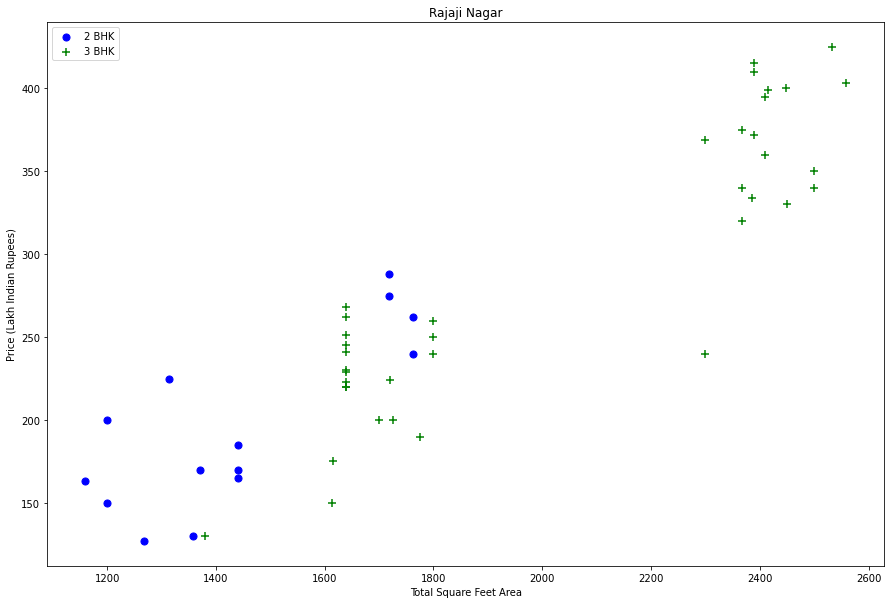

In [60]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

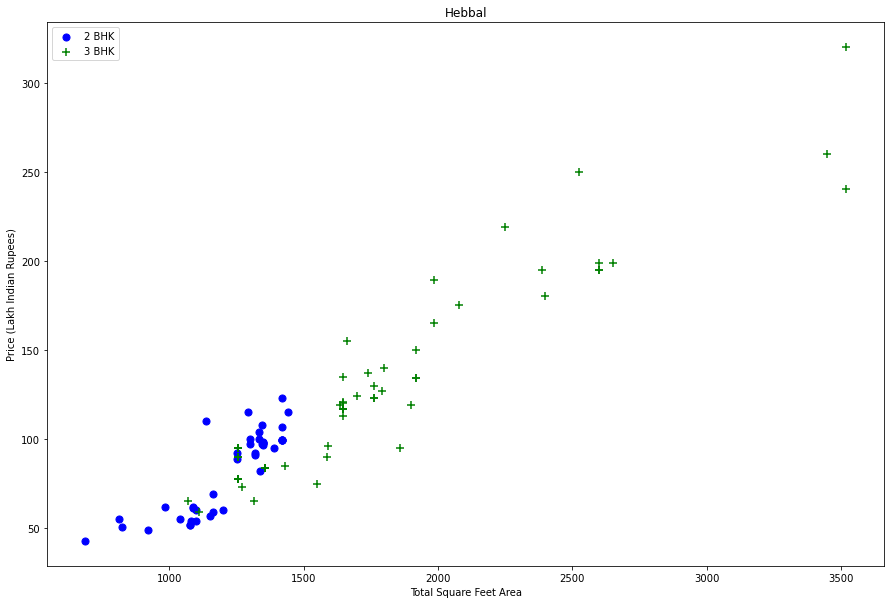

In [61]:
plot_scatter_chart(df7,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [62]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

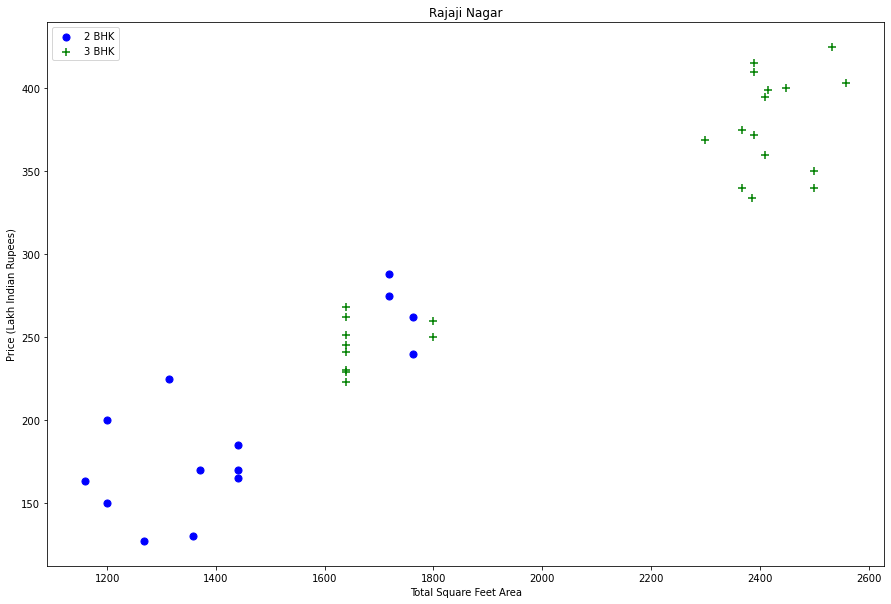

In [63]:
plot_scatter_chart(df8,"Rajaji Nagar")

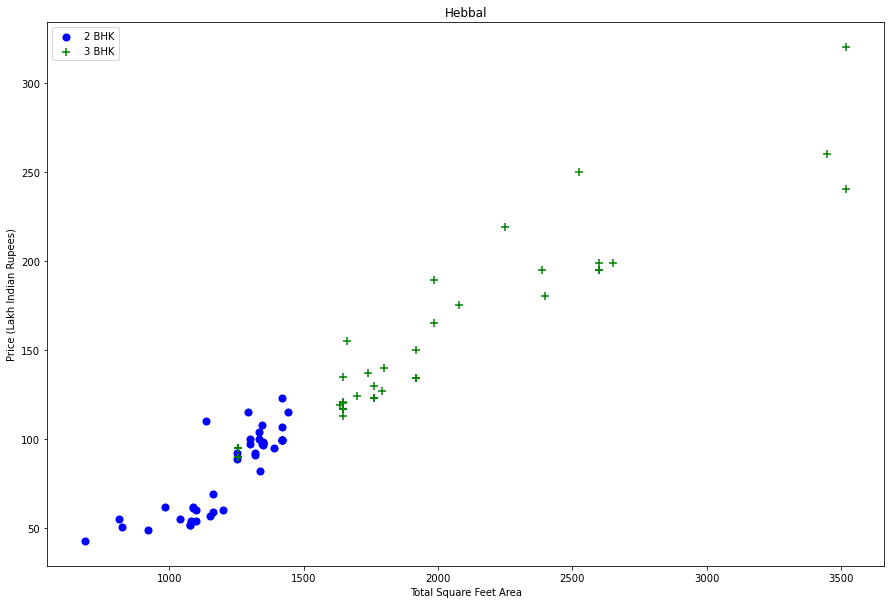

In [64]:
plot_scatter_chart(df8,"Hebbal")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

Text(0, 0.5, 'Count')

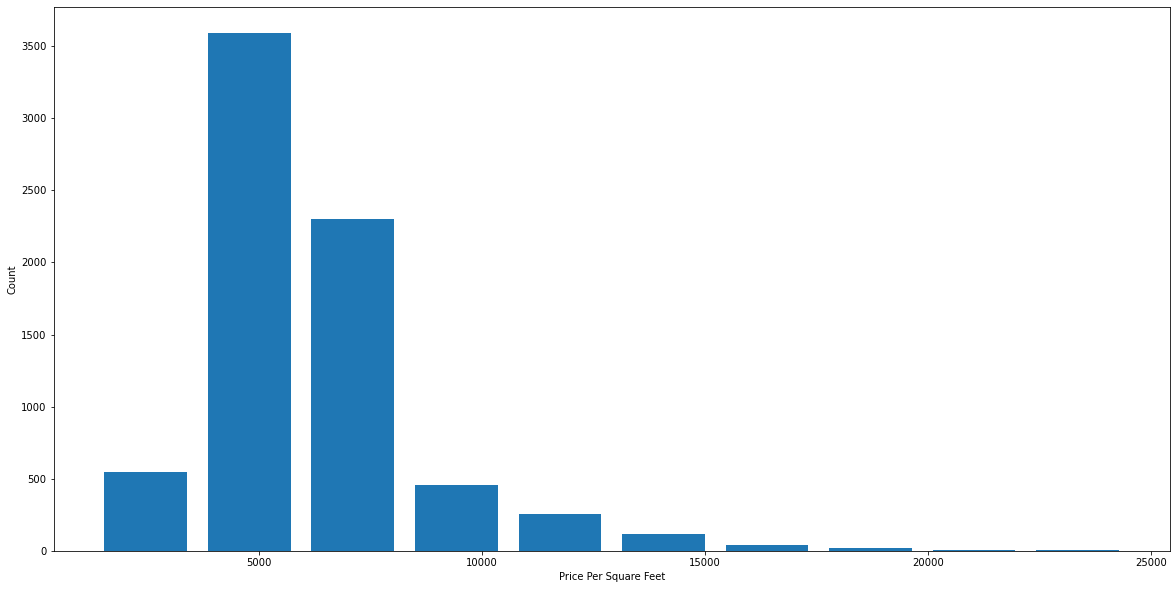

In [65]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<h2 style='color:blue'>Outlier Removal Using Bathrooms Feature</h2>

In [66]:
df8.head(10)

location       size  total_sqft  Bathroom  price  bhk  \
0   1st Block Jayanagar      4 BHK      2850.0       4.0  428.0    4   
1   1st Block Jayanagar      3 BHK      1630.0       3.0  194.0    3   
2   1st Block Jayanagar      3 BHK      1875.0       2.0  235.0    3   
3   1st Block Jayanagar      3 BHK      1200.0       2.0  130.0    3   
4   1st Block Jayanagar      2 BHK      1235.0       2.0  148.0    2   
5   1st Block Jayanagar      4 BHK      2750.0       4.0  413.0    4   
6   1st Block Jayanagar      4 BHK      2450.0       4.0  368.0    4   
8    1st Phase JP Nagar      3 BHK      1875.0       3.0  167.0    3   
9    1st Phase JP Nagar  5 Bedroom      1500.0       5.0   85.0    5   
10   1st Phase JP Nagar      3 BHK      2065.0       4.0  210.0    3   

    price_per_sqft  
0     15017.543860  
1     11901.840491  
2     12533.333333  
3     10833.333333  
4     11983.805668  
5     15018.181818  
6     15020.408163  
8      8906.666667  
9      5666.666667  
10    10169.491525

In [67]:
df8.Bathroom.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

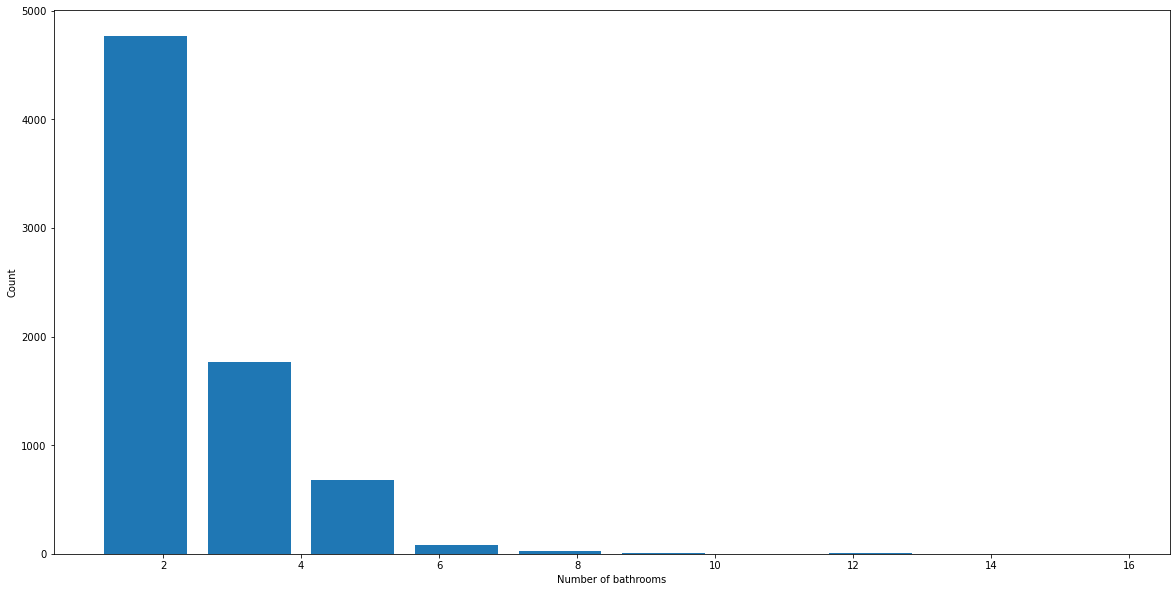

In [68]:
plt.hist(df8.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [69]:
df8[df8.Bathroom>10]

location    size  total_sqft  Bathroom  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0      12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0      12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0      16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0      12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0      13.0  275.0   13     5069.124424

**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [70]:
df8[df8.Bathroom>df8.bhk+2]

location       size  total_sqft  Bathroom   price  bhk  \
1626  Chikkabanavar  4 Bedroom      2460.0       7.0    80.0    4   
5238     Nagasandra  4 Bedroom      7000.0       8.0   450.0    4   
6711    Thanisandra      3 BHK      1806.0       6.0   116.0    3   
8411          other      6 BHK     11338.0       9.0  1000.0    6   

      price_per_sqft  
1626     3252.032520  
5238     6428.571429  
6711     6423.034330  
8411     8819.897689

In [71]:
df8.Bathroom.shape

(7329,)

**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [72]:
df9 = df8[df8.Bathroom<df8.bhk+2]
df9.shape

(7251, 7)

In [73]:
df9.Bathroom.shape

(7251,)

In [74]:
df9.head(5)

location   size  total_sqft  Bathroom  price  bhk  \
0  1st Block Jayanagar  4 BHK      2850.0       4.0  428.0    4   
1  1st Block Jayanagar  3 BHK      1630.0       3.0  194.0    3   
2  1st Block Jayanagar  3 BHK      1875.0       2.0  235.0    3   
3  1st Block Jayanagar  3 BHK      1200.0       2.0  130.0    3   
4  1st Block Jayanagar  2 BHK      1235.0       2.0  148.0    2   

   price_per_sqft  
0    15017.543860  
1    11901.840491  
2    12533.333333  
3    10833.333333  
4    11983.805668

In [75]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

location  total_sqft  Bathroom  price  bhk
0  1st Block Jayanagar      2850.0       4.0  428.0    4
1  1st Block Jayanagar      1630.0       3.0  194.0    3
2  1st Block Jayanagar      1875.0       2.0  235.0    3

<h2 style='color:blue'>Use One Hot Encoding For Location</h2>

In [76]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 242 columns]

In [77]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  Bathroom  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0       4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0       3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0       2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0       2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0       2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 246 columns]

In [78]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

total_sqft  Bathroom  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0       4.0  428.0    4                    1                   0   
1      1630.0       3.0  194.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  

[2 rows x 245 columns]

<h2 style='color:blue'>Build a Model Now...</h2>


In [79]:
df12.shape

(7251, 245)

In [80]:
X = df12.drop(['price'],axis='columns')
X.head(3)

total_sqft  Bathroom  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0       4.0    4                    1                   0   
1      1630.0       3.0    3                    1                   0   
2      1875.0       2.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  

[3 rows x 244 columns]

In [81]:
X.shape

(7251, 244)

In [82]:
y = df12.price
y.head(4)

0    428.0
1    194.0
2    235.0
3    130.0
Name: price, dtype: float64

In [83]:
len(y)

7251

In [84]:
y.shape

(7251,)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [86]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874306

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [87]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [88]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


model  best_score  \
0  linear_regression    0.818354   
1              lasso    0.687429   
2      decision_tree    0.726308   

                                         best_params  
0                                {'normalize': True}  
1                {'alpha': 1, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

<h2 style='color:blue'>Test the model for few properties</h2>

In [92]:
def predict_price(location,sqft,Bathroom,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = Bathroom
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [93]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677178087

In [94]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395204693

In [95]:
predict_price('Indira Nagar',1000, 2, 2)

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006874

In [96]:
predict_price('Indira Nagar',1000, 3, 3)

c:\users\dell1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.5843020203348